In [30]:
import nltk
from nltk.corpus import inaugural

nltk.download("inaugural")


[nltk_data] Downloading package inaugural to /home/vscode/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [31]:
for idx, fileid in enumerate(inaugural.fileids()):
    print(f"#{idx+1} {fileid}")


#1 1789-Washington.txt
#2 1793-Washington.txt
#3 1797-Adams.txt
#4 1801-Jefferson.txt
#5 1805-Jefferson.txt
#6 1809-Madison.txt
#7 1813-Madison.txt
#8 1817-Monroe.txt
#9 1821-Monroe.txt
#10 1825-Adams.txt
#11 1829-Jackson.txt
#12 1833-Jackson.txt
#13 1837-VanBuren.txt
#14 1841-Harrison.txt
#15 1845-Polk.txt
#16 1849-Taylor.txt
#17 1853-Pierce.txt
#18 1857-Buchanan.txt
#19 1861-Lincoln.txt
#20 1865-Lincoln.txt
#21 1869-Grant.txt
#22 1873-Grant.txt
#23 1877-Hayes.txt
#24 1881-Garfield.txt
#25 1885-Cleveland.txt
#26 1889-Harrison.txt
#27 1893-Cleveland.txt
#28 1897-McKinley.txt
#29 1901-McKinley.txt
#30 1905-Roosevelt.txt
#31 1909-Taft.txt
#32 1913-Wilson.txt
#33 1917-Wilson.txt
#34 1921-Harding.txt
#35 1925-Coolidge.txt
#36 1929-Hoover.txt
#37 1933-Roosevelt.txt
#38 1937-Roosevelt.txt
#39 1941-Roosevelt.txt
#40 1945-Roosevelt.txt
#41 1949-Truman.txt
#42 1953-Eisenhower.txt
#43 1957-Eisenhower.txt
#44 1961-Kennedy.txt
#45 1965-Johnson.txt
#46 1969-Nixon.txt
#47 1973-Nixon.txt
#48 1977-Car

In [32]:
presidents = set([fileid[5:-4] for fileid in inaugural.fileids()])
president_data_dict = {}

for index, president in enumerate(presidents):
    speeches = [inaugural.sents(file_id) for file_id in inaugural.fileids() if president in file_id]
    sent_num = len([sent for speech in speeches for sent in speech])
    president_data_dict[president] = sent_num

sorted_dict: dict[str, int] = dict(
    sorted(president_data_dict.items(), key=lambda pd: pd[1], reverse=True)
)

for idx, president_item in enumerate(sorted_dict.items()):
    print(f"{idx + 1}: {president_item[0]} - {president_item[1]} sentences")


1: Harrison - 367 sentences
2: Bush - 337 sentences
3: Roosevelt - 308 sentences
4: Reagan - 253 sentences
5: Monroe - 251 sentences
6: McKinley - 230 sentences
7: Eisenhower - 215 sentences
8: Obama - 204 sentences
9: Coolidge - 197 sentences
10: Clinton - 193 sentences
11: Nixon - 175 sentences
12: Biden - 170 sentences
13: Lincoln - 165 sentences
14: Taft - 159 sentences
15: Hoover - 158 sentences
16: Polk - 153 sentences
17: Harding - 149 sentences
18: Wilson - 128 sentences
19: Truman - 116 sentences
20: Garfield - 112 sentences
21: Adams - 111 sentences
22: Pierce - 104 sentences
23: Cleveland - 102 sentences
24: VanBuren - 95 sentences
25: Johnson - 94 sentences
26: Trump - 90 sentences
27: Buchanan - 89 sentences
28: Jefferson - 87 sentences
29: Grant - 85 sentences
30: Hayes - 59 sentences
31: Jackson - 55 sentences
32: Madison - 54 sentences
33: Carter - 53 sentences
34: Kennedy - 52 sentences
35: Washington - 28 sentences
36: Taylor - 22 sentences


In [33]:
import nltk

TARGET_PRESIDENT = "Biden"
NON_TARGET_PRESIDENT = "Obama"

nontarget_speeches = [
    inaugural.sents(file_id) for file_id in inaugural.fileids() if NON_TARGET_PRESIDENT in file_id
]
target_speeches = [
    inaugural.sents(file_id) for file_id in inaugural.fileids() if TARGET_PRESIDENT in file_id
]

nontarget_sents = [sent for speech in nontarget_speeches for sent in speech]
target_sents = [sent for speech in target_speeches for sent in speech]

for sent in nontarget_sents[:50]:
    print(" ".join(sent))
print(f"...\n\nSpeaker: President {NON_TARGET_PRESIDENT}, {len(nontarget_sents)} sentences")


My fellow citizens :
I stand here today humbled by the task before us , grateful for the trust you have bestowed , mindful of the sacrifices borne by our ancestors .
I thank President Bush for his service to our nation , as well as the generosity and cooperation he has shown throughout this transition .
Forty - four Americans have now taken the presidential oath .
The words have been spoken during rising tides of prosperity and the still waters of peace .
Yet , every so often the oath is taken amidst gathering clouds and raging storms .
At these moments , America has carried on not simply because of the skill or vision of those in high office , but because We the People have remained faithful to the ideals of our forbearers , and true to our founding documents .
So it has been .
So it must be with this generation of Americans .
That we are in the midst of crisis is now well understood .
Our nation is at war , against a far - reaching network of violence and hatred .
Our economy is badl

In [34]:
for sent in target_sents[:50]:
    print(" ".join(sent))

print(f"...\n\nSpeaker: President {TARGET_PRESIDENT}, {len(target_sents)} sentences")


Chief Justice Roberts , Vice President Harris , Speaker Pelosi , Leader Schumer , Leader McConnell , Vice President Pence , and my distinguished guests , and my fellow Americans : This is America ' s day .
This is democracy ' s day , a day of history and hope , of renewal and resolve .
Through a crucible for the ages America has been tested anew , and America has risen to the challenge .
Today we celebrate the triumph not of a candidate , but of a cause , the cause of democracy .
The peopleâ  the will of the people has been heard , and the will of the people has been heeded .
We ' ve learned again that democracy is precious , democracy is fragile .
And at this hour , my friends , democracy has prevailed .
So now , on this hallowed ground where just a few days ago violence sought to shake the Capitol ' s very foundation , we come together as one Nation under God , indivisible , to carry out the peaceful transfer of power as we have for more than two centuries .
As we look ahead in our

In [35]:
from grammar_analysis import FrequencyCalculator

fc = FrequencyCalculator()
all_tags: set[str] = set()

for sent in nontarget_sents + target_sents:
    all_tags.update(fc.all_pos_frequency(sent).keys())

print(all_tags)


{'WRB', 'RP', 'NNP', 'RBS', 'WDT', 'JJ', 'NNPS', 'WP', ':', 'VB', 'VBZ', 'DT', 'VBG', 'CC', 'PRP$', ',', 'VBD', 'JJR', 'NN', 'JJS', 'UH', 'TO', 'CD', "''", 'IN', 'MD', '.', 'WP$', 'EX', 'NNS', 'RB', 'RBR', 'VBN', 'VBP', 'POS', 'PDT', 'PRP'}


In [36]:
from grammar_analysis import DatasetGenerator
import pandas as pd
import numpy as np

dg = DatasetGenerator(all_tags)
data = []
correctness = []

for b_sent in nontarget_sents:
    x, y = dg.generate_dataset_sent(b_sent, all_tags, False)
    data.append(x)
    correctness.append(y)

for b_sent in target_sents:
    x, y = dg.generate_dataset_sent(b_sent, all_tags, True)
    data.append(x)
    correctness.append(y)

df = pd.DataFrame(data, columns=dg.columns)
nd_correctness = np.array(correctness)

display(df.head(10))


,word variation,uncommon word frequency,sentence length,average word length,WRB,RP,NNP,RBS,WDT,JJ,...,WP$,EX,NNS,RB,RBR,VBN,VBP,POS,PDT,PRP
0,1.000000,1.000000,4,4.250000,0.0,0.0,0.000000,0.0,0.0,0.250000,...,0.0,0.0,0.250000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.857143,0.571429,28,4.178571,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.035714,0.035714,0.0,0.035714,0.035714,0.0,0.0,0.035714
2,0.960000,0.560000,25,4.560000,0.0,0.0,0.040000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.040000,0.0,0.040000,0.040000,0.0,0.0,0.040000
3,1.000000,0.727273,11,4.636364,0.0,0.0,0.090909,0.0,0.0,0.090909,...,0.0,0.0,0.000000,0.090909,0.0,0.090909,0.090909,0.0,0.0,0.000000
4,0.941176,0.588235,17,4.470588,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.058824,0.058824,0.0,0.058824,0.058824,0.0,0.0,0.000000
5,1.000000,0.750000,16,4.187500,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.062500,0.062500,0.0,0.062500,0.000000,0.0,0.0,0.000000
6,0.795455,0.500000,44,4.227273,0.0,0.0,0.022727,0.0,0.0,0.022727,...,0.0,0.0,0.022727,0.022727,0.0,0.022727,0.022727,0.0,0.0,0.022727
7,1.000000,0.400000,5,2.400000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.200000,0.000000,0.0,0.0,0.200000
8,1.000000,0.500000,10,4.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.100000
9,1.000000,0.461538,13,3.615385,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.076923,0.0,0.000000,0.076923,0.0,0.0,0.076923


In [37]:
print(df.dtypes)


word variation             float64
uncommon word frequency    float64
sentence length              int64
average word length        float64
WRB                        float64
RP                         float64
NNP                        float64
RBS                        float64
WDT                        float64
JJ                         float64
NNPS                       float64
WP                         float64
:                          float64
VB                         float64
VBZ                        float64
DT                         float64
VBG                        float64
CC                         float64
PRP$                       float64
,                          float64
VBD                        float64
JJR                        float64
NN                         float64
JJS                        float64
UH                         float64
TO                         float64
CD                         float64
''                         float64
IN                  

In [38]:
print(df.isna().sum())


word variation             0
uncommon word frequency    0
sentence length            0
average word length        0
WRB                        0
RP                         0
NNP                        0
RBS                        0
WDT                        0
JJ                         0
NNPS                       0
WP                         0
:                          0
VB                         0
VBZ                        0
DT                         0
VBG                        0
CC                         0
PRP$                       0
,                          0
VBD                        0
JJR                        0
NN                         0
JJS                        0
UH                         0
TO                         0
CD                         0
''                         0
IN                         0
MD                         0
.                          0
WP$                        0
EX                         0
NNS                        0
RB            

In [39]:
import sklearn
import lightgbm as lgb

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, nd_correctness)

model = lgb.LGBMClassifier()
model.fit(X_train.values, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

val = sklearn.metrics.roc_auc_score(y_test, y_pred_prob)
print(f"auc-rocスコア: {val}")


auc-rocスコア: 0.8295454545454545


In [40]:
display(pd.crosstab(y_test, y_pred))


col_0,False,True
row_0,,
False,37,13
True,12,32


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


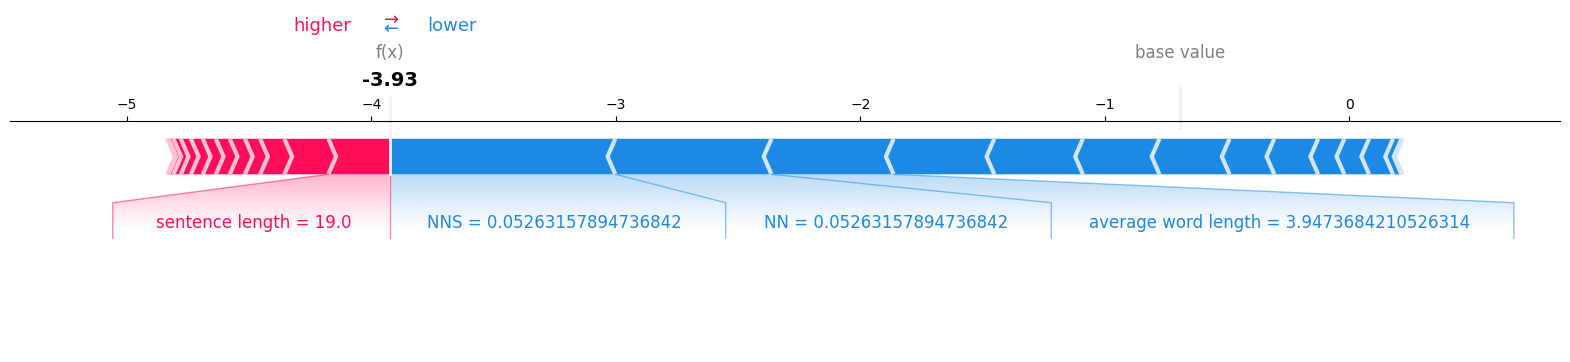

In [41]:
import shap

exp = shap.TreeExplainer(model)
sv_test = exp.shap_values(X_test)[1]

# shap.initjs()
shap.force_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0], matplotlib=True)


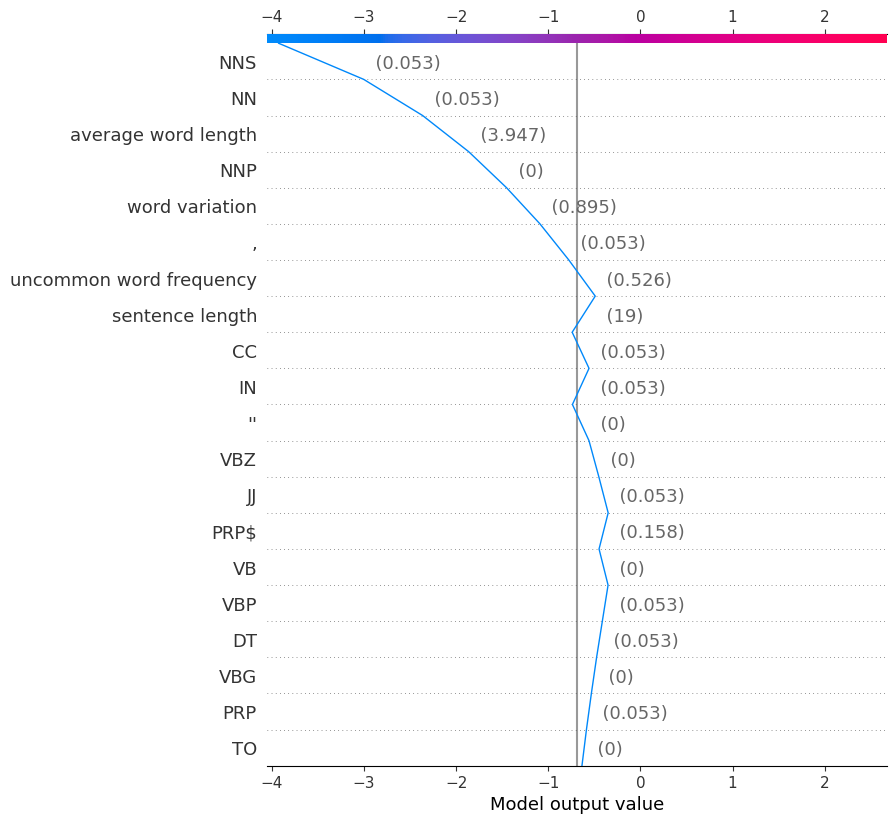

In [42]:
shap.decision_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


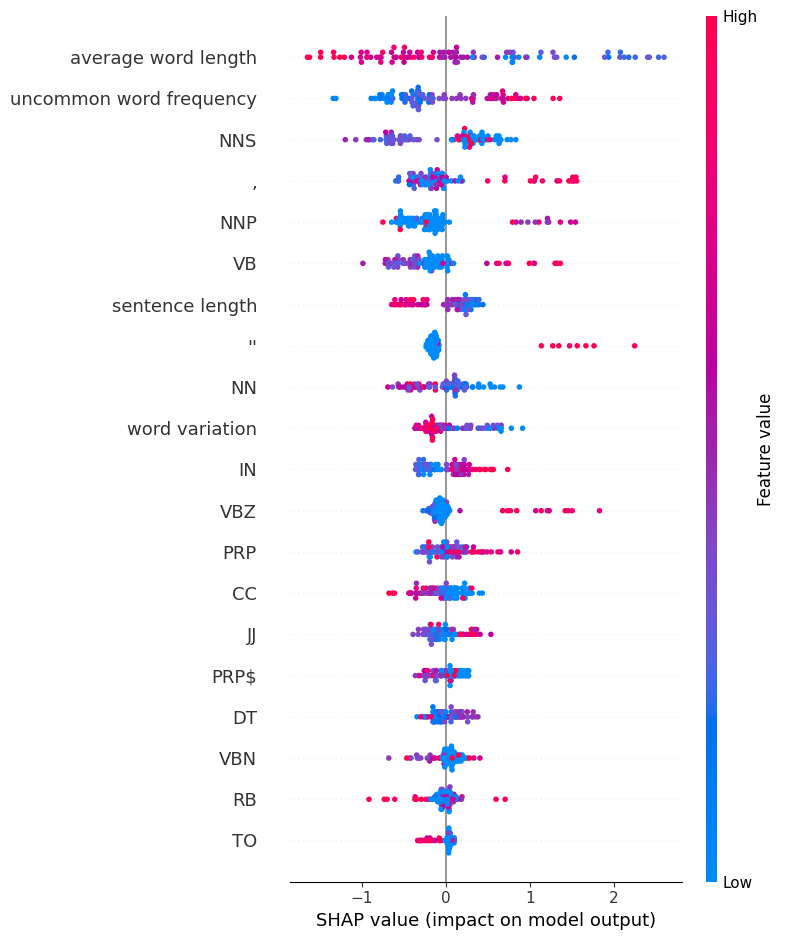

In [43]:
shap.summary_plot(sv_test, X_test)


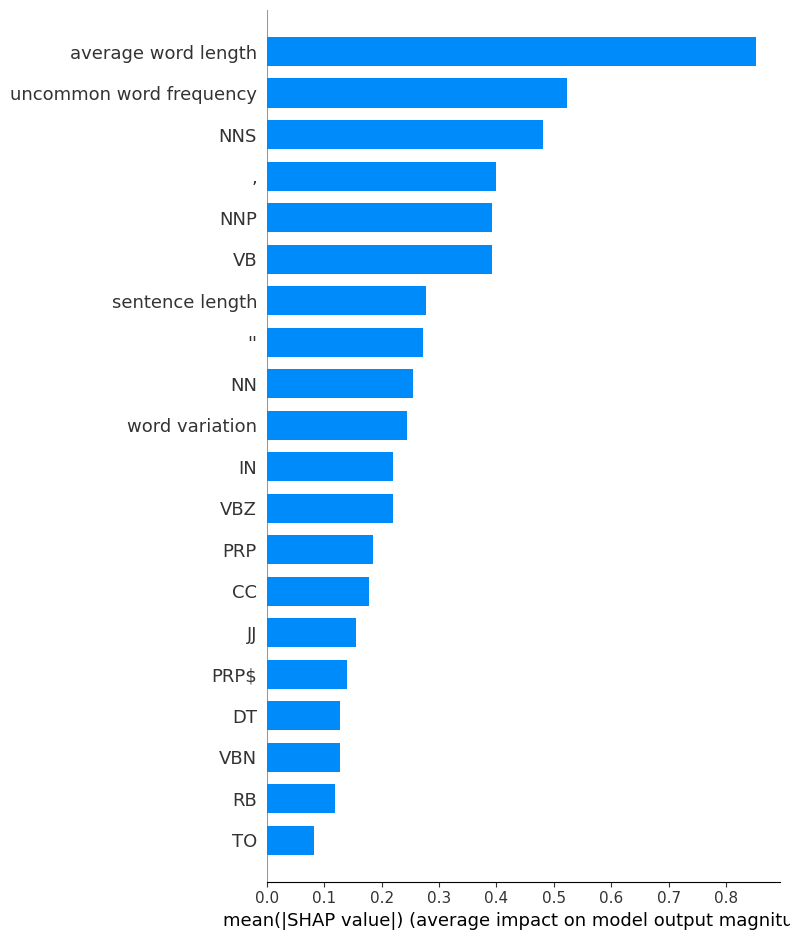

In [44]:
shap.summary_plot(sv_test, X_test, plot_type="bar")
